In [52]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 9078

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [53]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]]


## 1.2 返回矩阵的行数和列数

In [54]:
# TODO 返回矩阵的行数和列数
def shape(M):
    row_num = len(M)
    col_num = len(M[0]) if row_num >= 1 else 0
    return row_num,col_num

In [55]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [56]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    rowNum, colNum = shape(M)
    for r in range(rowNum):
        for c in range(colNum):
            M[r][c] = round(M[r][c], decPts)

In [57]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.066s

OK


## 1.4 计算矩阵的转置

In [58]:
# TODO 计算矩阵的转置
def transpose(M):
    #谢谢你的建议，这种写法更简洁！！
    #这里用到了python函数调用时，传参数的一个语法糖－－分解参数
    #zip(*M)中的 *M ， 其中M是一个二维iterable，会被分解多个list，一个list是一行
    #这多个list又被zip拉链在一起，就使得每一列成为一个list
    return [list(col) for col in zip(*M)]

In [59]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


## 1.5 计算矩阵乘法 AB

In [60]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    aRowNum,aColNum = shape(A)
    bRowNum,bColNum = shape(B)
#     print aRowNum, aColNum
#     print bRowNum, bColNum
    if (aColNum!=bRowNum and aRowNum!=bColNum) or aColNum==0 or bRowNum==0 or aRowNum==0 or bColNum==0:
        raise ValueError('cannot mulitply the matrixs or dimension is/are 0!')
    transformedB = transpose(B)
    newM = []
    for aRow in A:
        newRow = [sum([ab[0]*ab[1] for ab in zip(aRow, bCol)]) for bCol in transformedB]
        newM.append(newRow)
    return newM

In [61]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.057s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [62]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    aRowNum,aColNum = shape(A)
    bRowNum,bColNum = shape(b)
    if aRowNum!=bRowNum or aRowNum==0 or aColNum==0 or bRowNum==0 or bColNum!=1:
        raise ValueError('bad formed matrix in augmentMatrix!')
    #更简洁的写法！！
    return [ra+rb for ra,rb in zip(A,b)]

In [63]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [64]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1],M[r2] = M[r2],M[r1]

In [65]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [66]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale==0:
        raise ValueError("(scaleRow) scale should not be 0!")
    M[r] = [i*scale for i in M[r]]

In [67]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [68]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    M[r1] = [t[0]+t[1]*scale for t in zip(M[r1], M[r2])]

In [69]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

In [70]:
# 不要修改这里！
from helper import *

A = generateMatrix(4,seed,singular=False)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

   8,   3,  -5,  -9 ||  1  
  -1,   7,   7,   8 ||  1  
  -5,   7,   6,  -7 ||  1  
   1,  -2,  -5,   2 ||  1  


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    8 & 3 & -5 & -9 & 1\\
    -1 & 7 & 7 & 8 & 1\\
    -5 & 7 & 6 & -7 & 1\\
    1 & -2 & -5 & 2 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{3}{8} & \frac{-5}{8} & \frac{-9}{8} & \frac{1}{8}\\
   0 & \frac{59}{8} & \frac{51}{8} & \frac{55}{8} & \frac{9}{8}\\
   0 & \frac{71}{8} & \frac{23}{8} & \frac{-101}{8} & \frac{13}{8}\\
   0 & \frac{-19}{8} & \frac{-35}{8} & \frac{25}{8} & \frac{7}{8}\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & \frac{-53}{71} & \frac{-42}{71} & \frac{4}{71}\\
   0 & 1 & \frac{23}{71} & \frac{-101}{71} & \frac{13}{71}\\
   0 & 0 & \frac{283}{71} & \frac{1233}{71} & \frac{-16}{71}\\
   0 & 0 & \frac{-256}{71} & \frac{-18}{71} & \frac{93}{71}\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{753}{283} & \frac{4}{283}\\
   0 & 1 & 0 & \frac{-802}{283} & \frac{57}{283}\\
   0 & 0 & 1 & \frac{1233}{283} & \frac{-16}{283}\\
   0 & 0 & 0 & \frac{4374}{283} & \frac{313}{283}\end{bmatrix}$
   
$ --> \begin{bmatrix}
   1 & 0 & 0 & 0 & \frac{-257}{1458}\\
   0 & 1 & 0 & 0 & \frac{884}{2187}\\
   0 & 0 & 1 & 0 & \frac{-179}{486}\\
   0 & 0 & 0 & 1 & \frac{313}{4374}\end{bmatrix}$   
$...$

In [71]:
# 不要修改这里！
A = generateMatrix(4,seed,singular=True)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

   0,  -7,   2,   2 ||  1  
  -7,  -9,   0,  -9 ||  1  
  -7,  -4,   4,  -5 ||  1  
  -7,  -9,  -1, -10 ||  1  


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    0 & -7 & 2 & 2 & 1\\
    -7 & -9 & 0 & -9 & 1\\
    -7 & -4 & 4 & -5 & 1\\
    -7 & -9 & -1 & -10 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{9}{7} & 0 & \frac{9}{7} & \frac{-1}{7}\\
   0 & -7 & 2 & 2 & 1\\
   0 & 5 & 4 & 4 & 0\\
   0 & 0 & -1 & -1 & 0\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & \frac{18}{49} & \frac{81}{49} & \frac{2}{49}\\
   0 & 1 & \frac{-2}{7} & \frac{-2}{7} & \frac{-1}{7}\\
   0 & 0 & \frac{38}{7} & \frac{38}{7} & \frac{5}{7}\\
   0 & 0 & -1 & -1 & 0\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{9}{7} & \frac{-1}{133}\\
   0 & 1 & 0 & 0 & \frac{-2}{19}\\
   0 & 0 & 1 & 1 & \frac{5}{38}\\
   0 & 0 & 0 & 0 & \frac{5}{38}\end{bmatrix}$    

当c为4的时候，对角线及对角线以下的所有第四列元素的绝对值的最大值为0，所以是奇异矩阵。

### 2.3.3 实现 Gaussian Jordan 消元法

In [72]:
# output of gj_Solve_in_fraction are only used to fill answer sheet for the two questions above

from fractions import Fraction
def grace_print(mf):
    def fraction_markdown(tf):
        if tf.denominator==1:
            return str(tf.numerator)
        else:
            return "\\frac{%d}{%d}" % (tf.numerator, tf.denominator)
    print '\n'.join([' , '.join([one.__str__() for one in oneRow]) for oneRow in mf])
    print '#'*9
    print '\n'.join(['   '+' & '.join([fraction_markdown(one) for one in oneRow])+'\\\\' for oneRow in mf])
    

def gj_Solve_in_fraction(A, b, decPts=4, epsilon = 1.0e-16):
    rowNum, colNum = shape(A)
    lineSys = augmentMatrix(A,b)
    lineSys = [[Fraction(oneItem,1) for oneItem in oneRow] for oneRow in lineSys]
    for c in range(colNum):
        absCols = [abs(lineSys[r][c]) if r>=c else -1 for r in range(rowNum)] 
        if(max(absCols)<=epsilon):
            return None
        maxIndex = absCols.index(max(absCols))
        swapRows(lineSys, c, maxIndex)
        scaleRow(lineSys, c, 1/lineSys[c][c])
        for inr in range(rowNum):
            if inr==c: continue
            addScaledRow(lineSys, inr, c, -1*lineSys[inr][c])
        grace_print(lineSys)
        print '-'*18
    return [[r[-1]] for r in lineSys]
# myA = [[8,3,-5,-9], [-1,7,7,8], [-5,7,6,-7], [1,-2,-5,2]]
myA = [[0,  -7,   2,   2],[-7,  -9,   0,  -9],[-7,  -4,   4,  -5],[-7,  -9,  -1, -10]]
myb = [[1],[1],[1],[1]]
gj_Solve_in_fraction(myA, myb)

1 , 9/7 , 0 , 9/7 , -1/7
0 , -7 , 2 , 2 , 1
0 , 5 , 4 , 4 , 0
0 , 0 , -1 , -1 , 0
#########
   1 & \frac{9}{7} & 0 & \frac{9}{7} & \frac{-1}{7}\\
   0 & -7 & 2 & 2 & 1\\
   0 & 5 & 4 & 4 & 0\\
   0 & 0 & -1 & -1 & 0\\
------------------
1 , 0 , 18/49 , 81/49 , 2/49
0 , 1 , -2/7 , -2/7 , -1/7
0 , 0 , 38/7 , 38/7 , 5/7
0 , 0 , -1 , -1 , 0
#########
   1 & 0 & \frac{18}{49} & \frac{81}{49} & \frac{2}{49}\\
   0 & 1 & \frac{-2}{7} & \frac{-2}{7} & \frac{-1}{7}\\
   0 & 0 & \frac{38}{7} & \frac{38}{7} & \frac{5}{7}\\
   0 & 0 & -1 & -1 & 0\\
------------------
1 , 0 , 0 , 9/7 , -1/133
0 , 1 , 0 , 0 , -2/19
0 , 0 , 1 , 1 , 5/38
0 , 0 , 0 , 0 , 5/38
#########
   1 & 0 & 0 & \frac{9}{7} & \frac{-1}{133}\\
   0 & 1 & 0 & 0 & \frac{-2}{19}\\
   0 & 0 & 1 & 1 & \frac{5}{38}\\
   0 & 0 & 0 & 0 & \frac{5}{38}\\
------------------


In [73]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    rowNum, colNum = shape(A)
    lineSys = augmentMatrix(A,b)
    for c in range(colNum):
        #这里我觉得应该不会有审阅中提到的可能的bug
        #因为在下面的列表表达式里，所有比c小的行，它们的c列的值我都取为了－1，
        #所以下面的max(absCols)应该不会找到那些比c小的行，只会往下找，即便下面有多个相同的max值，我就取第一个被找到的行。
        absCols = [abs(lineSys[r][c]) if r>=c else -1 for r in range(rowNum)] 
        if(max(absCols)<=epsilon):
            return None
        maxIndex = absCols.index(max(absCols))
        swapRows(lineSys, c, maxIndex)
        scaleRow(lineSys, c, 1.0/lineSys[c][c])
        for inr in range(rowNum):
            if inr==c: continue
            addScaledRow(lineSys, inr, c, -1.0*lineSys[inr][c])
            
    matxRound(lineSys, decPts)
    return [[r[-1]] for r in lineSys]

In [74]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 3.003s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3  线性回归

## 3.1 随机生成样本点

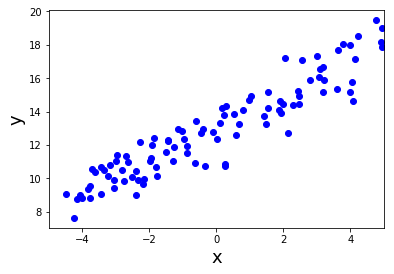

In [75]:
# 不要修改这里！
# 运行一次就够了！
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(seed,num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

/usr/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


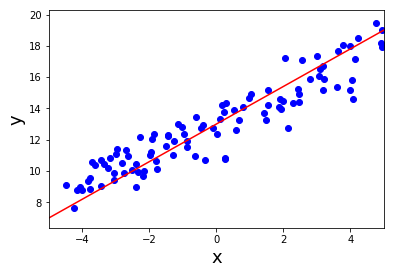

In [76]:
#TODO 请选择最适合的直线 y = mx + b
m = 1.2
b = 13

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [m*x+b for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [77]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    powList = [pow((y-m*x-b), 2) for x,y in zip(X,Y)]
    return sum(powList)*1.0/len(powList)

print(calculateMSE(X,Y,m,b))

1.36008547953


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m,b$ 让蓝点均匀覆盖在红线周围，然后微调 $m, b$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [78]:
# TODO 实现线性回归
'''
参数：X, Y
返回：m，b
'''
def linearRegression(X,Y):
    NX = [[one, 1] for one in X]
    NY = [[one] for one in Y]
    NXT = transpose(NX)
    A = matxMultiply(NXT, NX)
    b = matxMultiply(NXT, NY)
    result = gj_Solve(A, b)
#     print result
    return [one[0] for one in result]

m,b = linearRegression(X,Y)
print(m,b)

(0.9677, 13.0001)


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

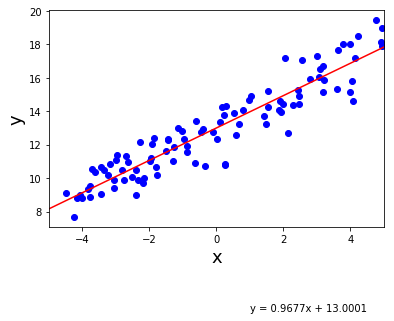

In [79]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m+b, x2*m+b

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.text(1,2,'y = {m}x + {b}'.format(m=m,b=b))
plt.show()

你求得的回归结果对当前数据集的MSE是多少？

In [80]:
mse = calculateMSE(X, Y, m, b)
print mse

0.968703691926
